# EDA of visualization and training a model by given attributes

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [2]:
import warnings
warnings.filterwarnings("ignore") 

In [3]:
#Load given dataset
data = p.read_csv('e.csv')
df=data.dropna()

In [4]:
df

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy
...,...,...
3608,@VivienLloyd Thank you so much! Just home - st...,sadness
3609,Just put the winter duvet on ☃️❄️🌬☔️,sadness
3610,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness
3611,@BluesfestByron second artist announcement loo...,sadness


In [5]:
df.columns

Index(['text', 'label'], dtype='object')

In [6]:
df.groupby('label').describe()

text                                                               
        count unique                                                top freq
label                                                                       
anger     857    857  How the fu*k! Who the heck! moved my fridge!.....    1
fear     1147   1147  I feel like I am drowning. #depression #anxiet...    1
joy       823    823  Just got back from seeing @GaryDelaney in Burs...    1
sadness   786    786                      Depression sucks! #depression    1

Text(0.5, 1.0, 'EMOTION')

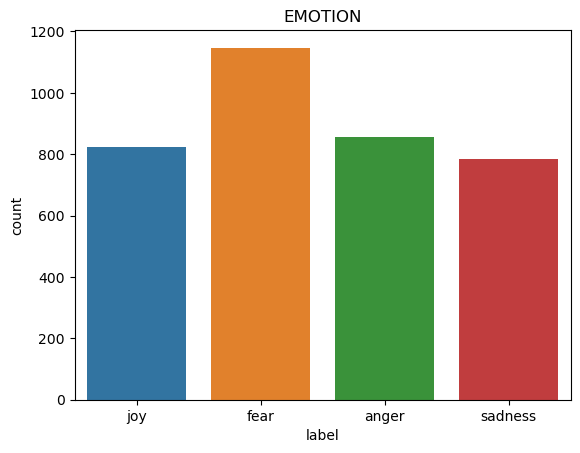

In [7]:
#plotting graph for distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = "label", data = df)
df.loc[:, 'label'].value_counts()
plt.title('EMOTION')

In [8]:
df['label'].unique()

array(['joy', 'fear', 'anger', 'sadness'], dtype=object)

Training model:

In [9]:
#!pip install nltk

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SPIRO15\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import string
# remove whitespaces
df['text']=df['text'].str.strip()
# lowercase the text
df['text'] = df['text'].str.lower()
#remove punctuation
punc = string.punctuation
table = str.maketrans('','',punc)
df['text']=df['text'].apply(lambda x: x.translate(table))
# tokenizing each message
df['word_tokens']=df.apply(lambda x: x['text'].split(' '),axis=1)
# removing stopwords
df['text'] = df.apply(lambda x: [word for word in x['word_tokens'] if word not in stopwords.words('english')],axis=1)
# stemming
ps = PorterStemmer()
df['stemmed']= df.apply(lambda x: [ps.stem(word) for word in x['text']],axis=1)
# remove single letter words
df['final_text'] = df.apply(lambda x: ' '.join([word for word in x['stemmed'] if len(word)>1]),axis=1)


In [12]:
# Now we'll create a vocabulary for the training set with word count
from collections import defaultdict
vocab=defaultdict(int) 
for text in df['final_text'].values:
    for elem in text.split(' '):
        vocab[elem]+=1
    
print(vocab)

defaultdict(<class 'int'>, {'got': 81, 'back': 81, 'see': 94, 'garydelaney': 2, 'burslem': 2, 'amaz': 74, 'face': 48, 'still': 95, 'hurt': 17, 'laugh': 44, 'much': 67, 'hilari': 39, 'oh': 36, 'dear': 10, 'even': 78, 'absolut': 25, 'hilar': 16, 'dont': 205, 'think': 109, 'long': 34, 'time': 130, 'wait': 48, 'week': 55, 'game': 37, '❤️❤️❤️': 1, 'cheer': 81, 'friday': 9, '❤️': 8, 'gardinerlov': 1, 'thank': 68, 'gloria': 1, 'your': 55, 'sweet': 15, 'thought': 42, 'made': 35, 'day': 143, 'joy': 35, 'love': 137, '😊💕': 1, 'feel': 123, 'bless': 16, 'work': 74, 'famili': 15, 'nanni': 1, 'noth': 26, 'amp': 162, 'appreci': 5, 'make': 154, 'smile': 77, 'today': 89, 'reach': 4, '1000': 3, 'subscrib': 3, 'yt': 2, 'goodday': 6, 'singaholic121': 2, 'good': 112, 'morn': 30, 'happi': 101, 'first': 53, 'fall': 14, 'let': 90, 'awesom': 7, 'autumnmemori': 2, 'annabailey': 2, 'laughter': 32, 'bridgetjonesbabi': 2, 'best': 48, 'thing': 72, 'ive': 56, 'seen': 21, 'age': 15, 'funni': 25, 'miss': 23, 'bridget':

In [13]:
# divide the set in training and test
from sklearn.model_selection import train_test_split
X,X_test,y,y_test = train_test_split(df.loc[:,'text':],df['label'],test_size=0.2)

In [14]:
#!pip install wordcloud

In [15]:
from wordcloud import WordCloud

ham=' '.join(X.loc[y=='joy','final_text'].values)
ham_text = WordCloud(background_color='white',max_words=2000,width = 800, height = 800).generate(ham)

spam=' '.join(X.loc[y=='sadness','final_text'].values)
spam_text = WordCloud(background_color='black',max_words=2000,width = 800, height = 800).generate(spam)




plt.figure(figsize=[30,50])

plt.subplot(1,3,1)
plt.imshow(ham_text,interpolation='bilinear')
plt.title('')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(spam_text, interpolation='bilinear')
plt.axis('off')
plt.title('')



ModuleNotFoundError: No module named 'wordcloud'